<a href="https://colab.research.google.com/github/Shreyas0744/Autonomous-Vehicle-Lane-Detection/blob/main/Autonomous_Vehicle_Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Your specific URL (converted to raw) and Image Path
# I have replaced 'blob' with 'raw' so the image file can be downloaded directly
url = "https://github.com/Shreyas0744/Autonomous-Vehicle-Lane-Detection/raw/main/lane%20detection.jpg"
image_path = "lane_detection.jpg"

# Download the image from your GitHub repository
try:
    response = requests.get(url)
    with open(image_path, 'wb') as f:
        f.write(response.content)
    print("Successfully downloaded your lane image!")
except Exception as e:
    print(f"Error downloading image: {e}")

Successfully downloaded your lane image!


In [2]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny_output = cv2.Canny(blur, 50, 150)
    return canny_output

def region_of_interest(image):
    height = image.shape[0]
    width = image.shape[1]
    # This polygon defines the triangle where the road usually sits
    # You might need to adjust these coordinates based on your specific image
    polygons = np.array([
        [(0, height), (width, height), (width//2, height//2)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            # Draw green lane lines
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)
    return line_image

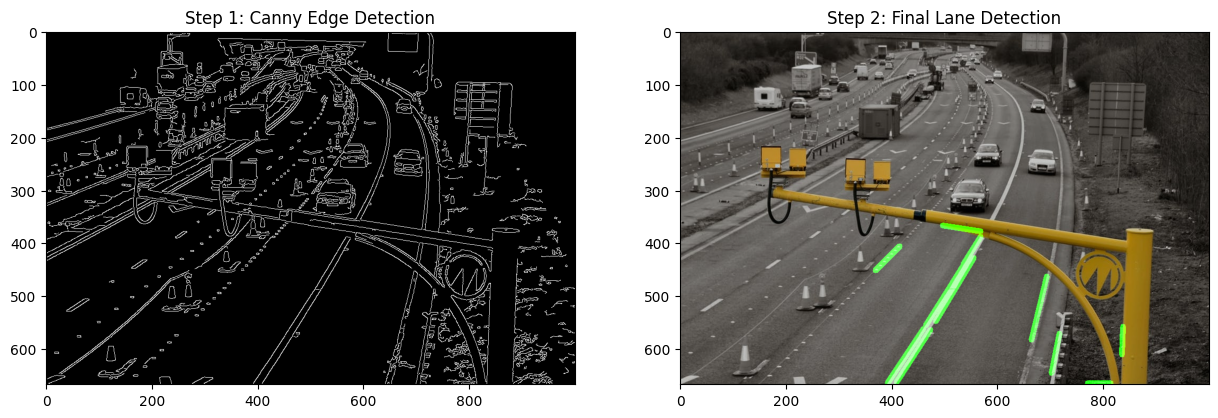

In [3]:
# Main Execution Logic
image = cv2.imread(image_path)
if image is None:
    print("Error: Could not open the image file. Check the path.")
else:
    lane_image = np.copy(image)
    canny_image = canny(lane_image)
    cropped_image = region_of_interest(canny_image)

    # Hough Transform to detect lines
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

    line_image = display_lines(lane_image, lines)
    # Merge the lines with the original image
    combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

    # Display the results
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title("Step 1: Canny Edge Detection")
    plt.imshow(canny_image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Step 2: Final Lane Detection")
    plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB))
    plt.show()